Description:

Write a class called User that is used to calculate the amount that a user will progress through a ranking system similar to the one Codewars uses.

Business Rules:

A user starts at rank -8 and can progress all the way to 8.
There is no 0 (zero) rank. The next rank after -1 is 1.
Users will complete activities. These activities also have ranks.
Each time the user completes a ranked activity the users rank progress is updated based off of the activity's rank
The progress earned from the completed activity is relative to what the user's current rank is compared to the rank of the activity
A user's rank progress starts off at zero, each time the progress reaches 100 the user's rank is upgraded to the next level
Any remaining progress earned while in the previous rank will be applied towards the next rank's progress (we don't throw any progress away). The exception is if there is no other rank left to progress towards (Once you reach rank 8 there is no more progression).
A user cannot progress beyond rank 8.
The only acceptable range of rank values is -8,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8. Any other value should raise an error.
The progress is scored like so:

Completing an activity that is ranked the same as that of the user's will be worth 3 points
Completing an activity that is ranked one ranking lower than the user's will be worth 1 point
Any activities completed that are ranking 2 levels or more lower than the user's ranking will be ignored
Completing an activity ranked higher than the current user's rank will accelerate the rank progression. The greater the difference between rankings the more the progression will be increased. The formula is 10 * d * d where d equals the difference in ranking between the activity and the user.
Logic Examples:

If a user ranked -8 completes an activity ranked -7 they will receive 10 progress
If a user ranked -8 completes an activity ranked -6 they will receive 40 progress
If a user ranked -8 completes an activity ranked -5 they will receive 90 progress
If a user ranked -8 completes an activity ranked -4 they will receive 160 progress, resulting in the user being upgraded to rank -7 and having earned 60 progress towards their next rank
If a user ranked -1 completes an activity ranked 1 they will receive 10 progress (remember, zero rank is ignored)
Code Usage Examples:

user = User()
user.rank # => -8
user.progress # => 0
user.inc_progress(-7)
user.progress # => 10
user.inc_progress(-5) # will add 90 progress
user.progress # => 0 # progress is now zero
user.rank # => -7 # rank was upgraded to -7
Note: Codewars no longer uses this algorithm for its own ranking system. It uses a pure Math based solution that gives consistent results no matter what order a set of ranked activities are completed at.

First request:
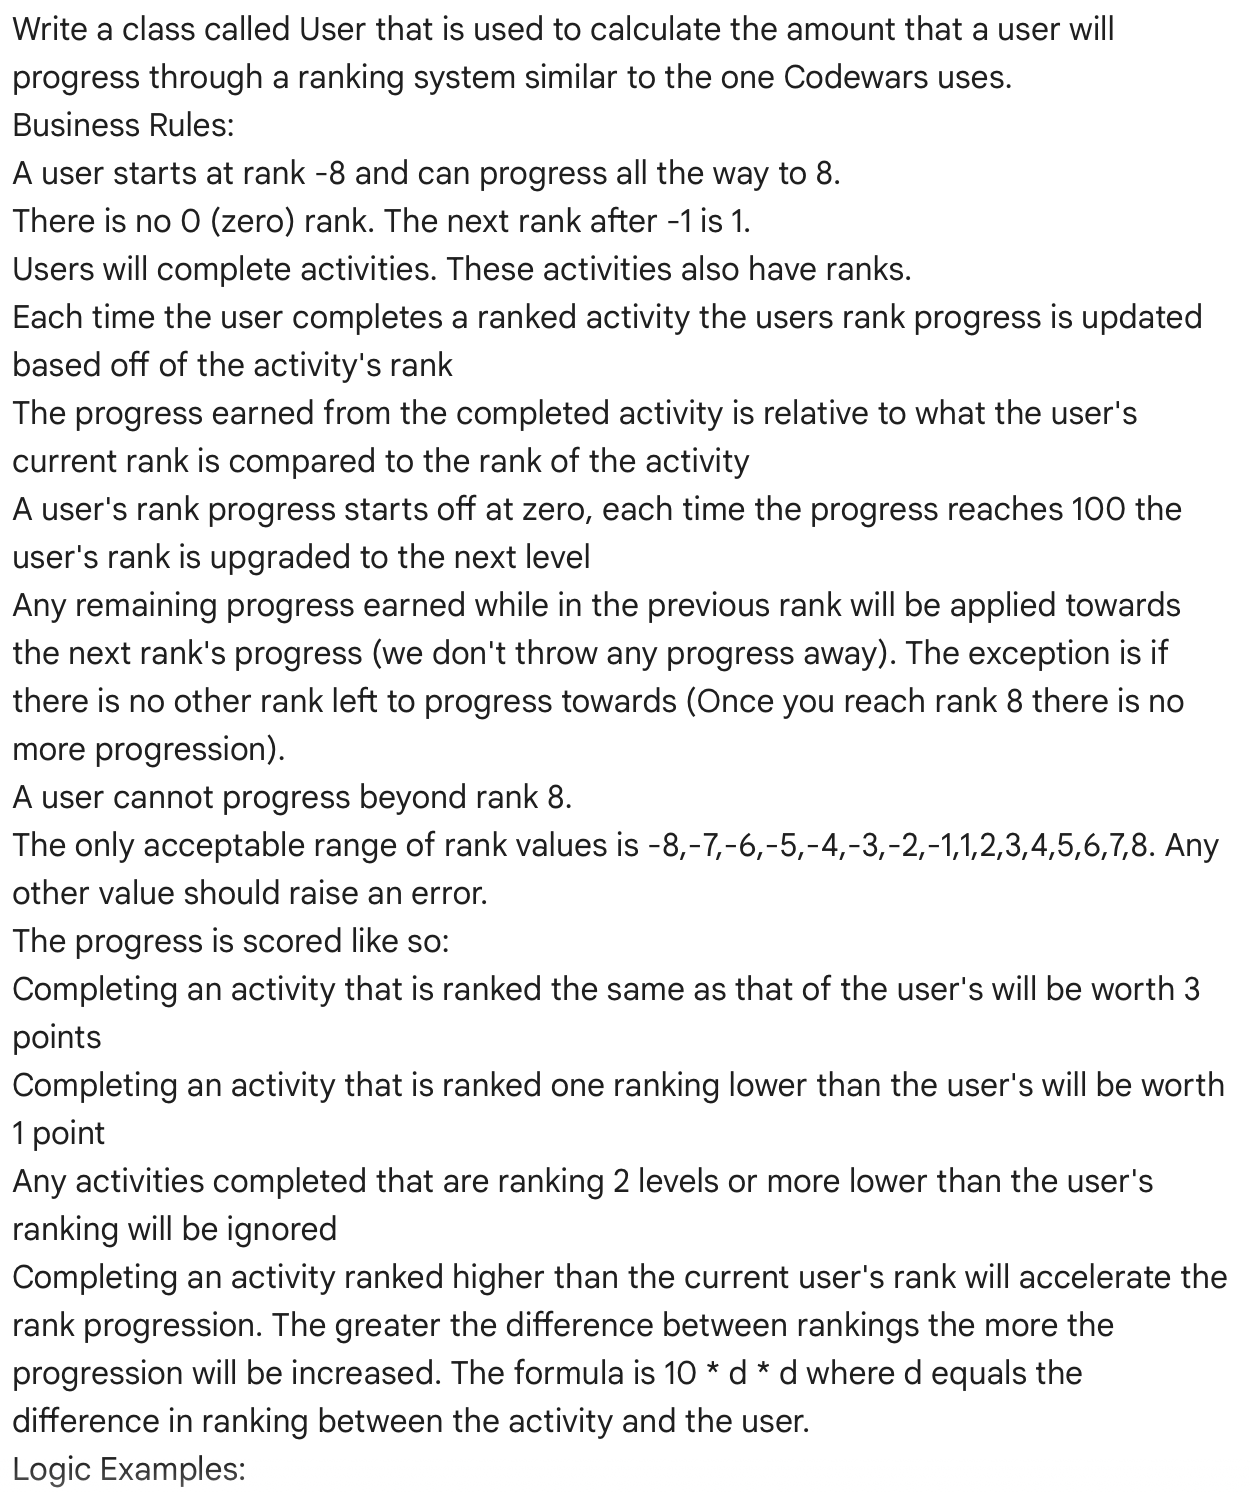

Gemini's response:

In [ ]:
class User:
  """
  Represents a user with rank and progress in a ranking system.
  """
  RANK_MAP = {-8: -8, -7: -7, -6: -6, -5: -5, -4: -4, -3: -3, -2: -2, -1: 1, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}

  def __init__(self):
    """
    Initializes a User object with rank -8 and progress 0.
    """
    self.rank = -8
    self.progress = 0

  def inc_progress(self, activity_rank):
    """
    Increases the user's progress based on the completed activity rank.

    Args:
      activity_rank: The rank of the completed activity.

    Raises:
      ValueError: If the activity rank is outside the valid range.
    """
    if activity_rank not in User.RANK_MAP:
      raise ValueError("Invalid activity rank")

    rank_diff = abs(self.rank - activity_rank)
    points = 0
    if rank_diff == 0:
      points = 3
    elif rank_diff == 1:
      points = 1
    elif rank_diff >= 2:
      points = 10 * rank_diff * rank_diff

    self.progress += points
    self._update_rank()

  def _update_rank(self):
    """
    Updates the user's rank based on accumulated progress.
    """
    while self.progress >= 100:
      self.progress -= 100
      self.rank = User.RANK_MAP[self.rank + 1]
      if self.rank == 8:
        # Reached max rank, stop progressing
        self.progress = 0
        break

  @property
  def rank(self):
    """
    Getter for the user's rank.
    """
    return self._rank

  @rank.setter
  def rank(self, value):
    """
    Setter for the user's rank with validation.
    """
    if value not in User.RANK_MAP:
      raise ValueError("Invalid rank value")
    self._rank = value

  @property
  def progress(self):
    """
    Getter for the user's progress.
    """
    return self._progress

  @progress.setter
  def progress(self, value):
    """
    Setter for the user's progress with validation (must be non-negative).
    """
    if value < 0:
      raise ValueError("Progress cannot be negative")
    self._progress = value


Explanations to code:

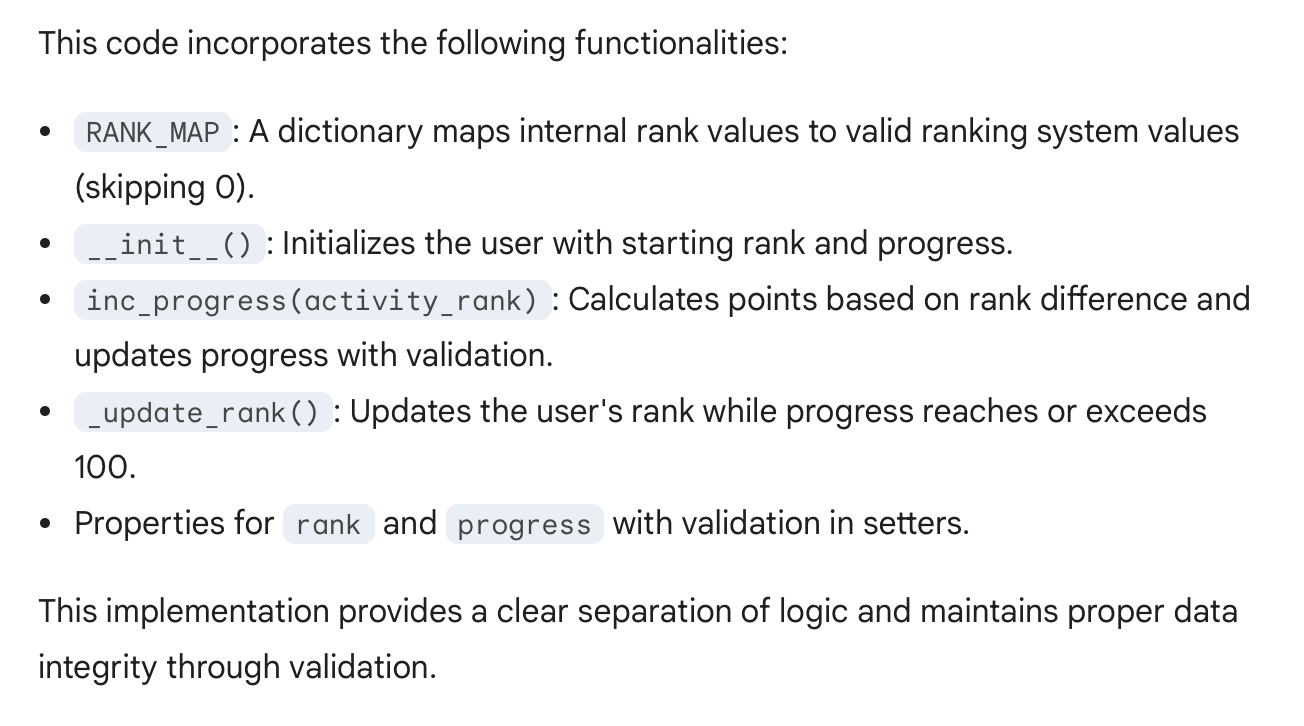

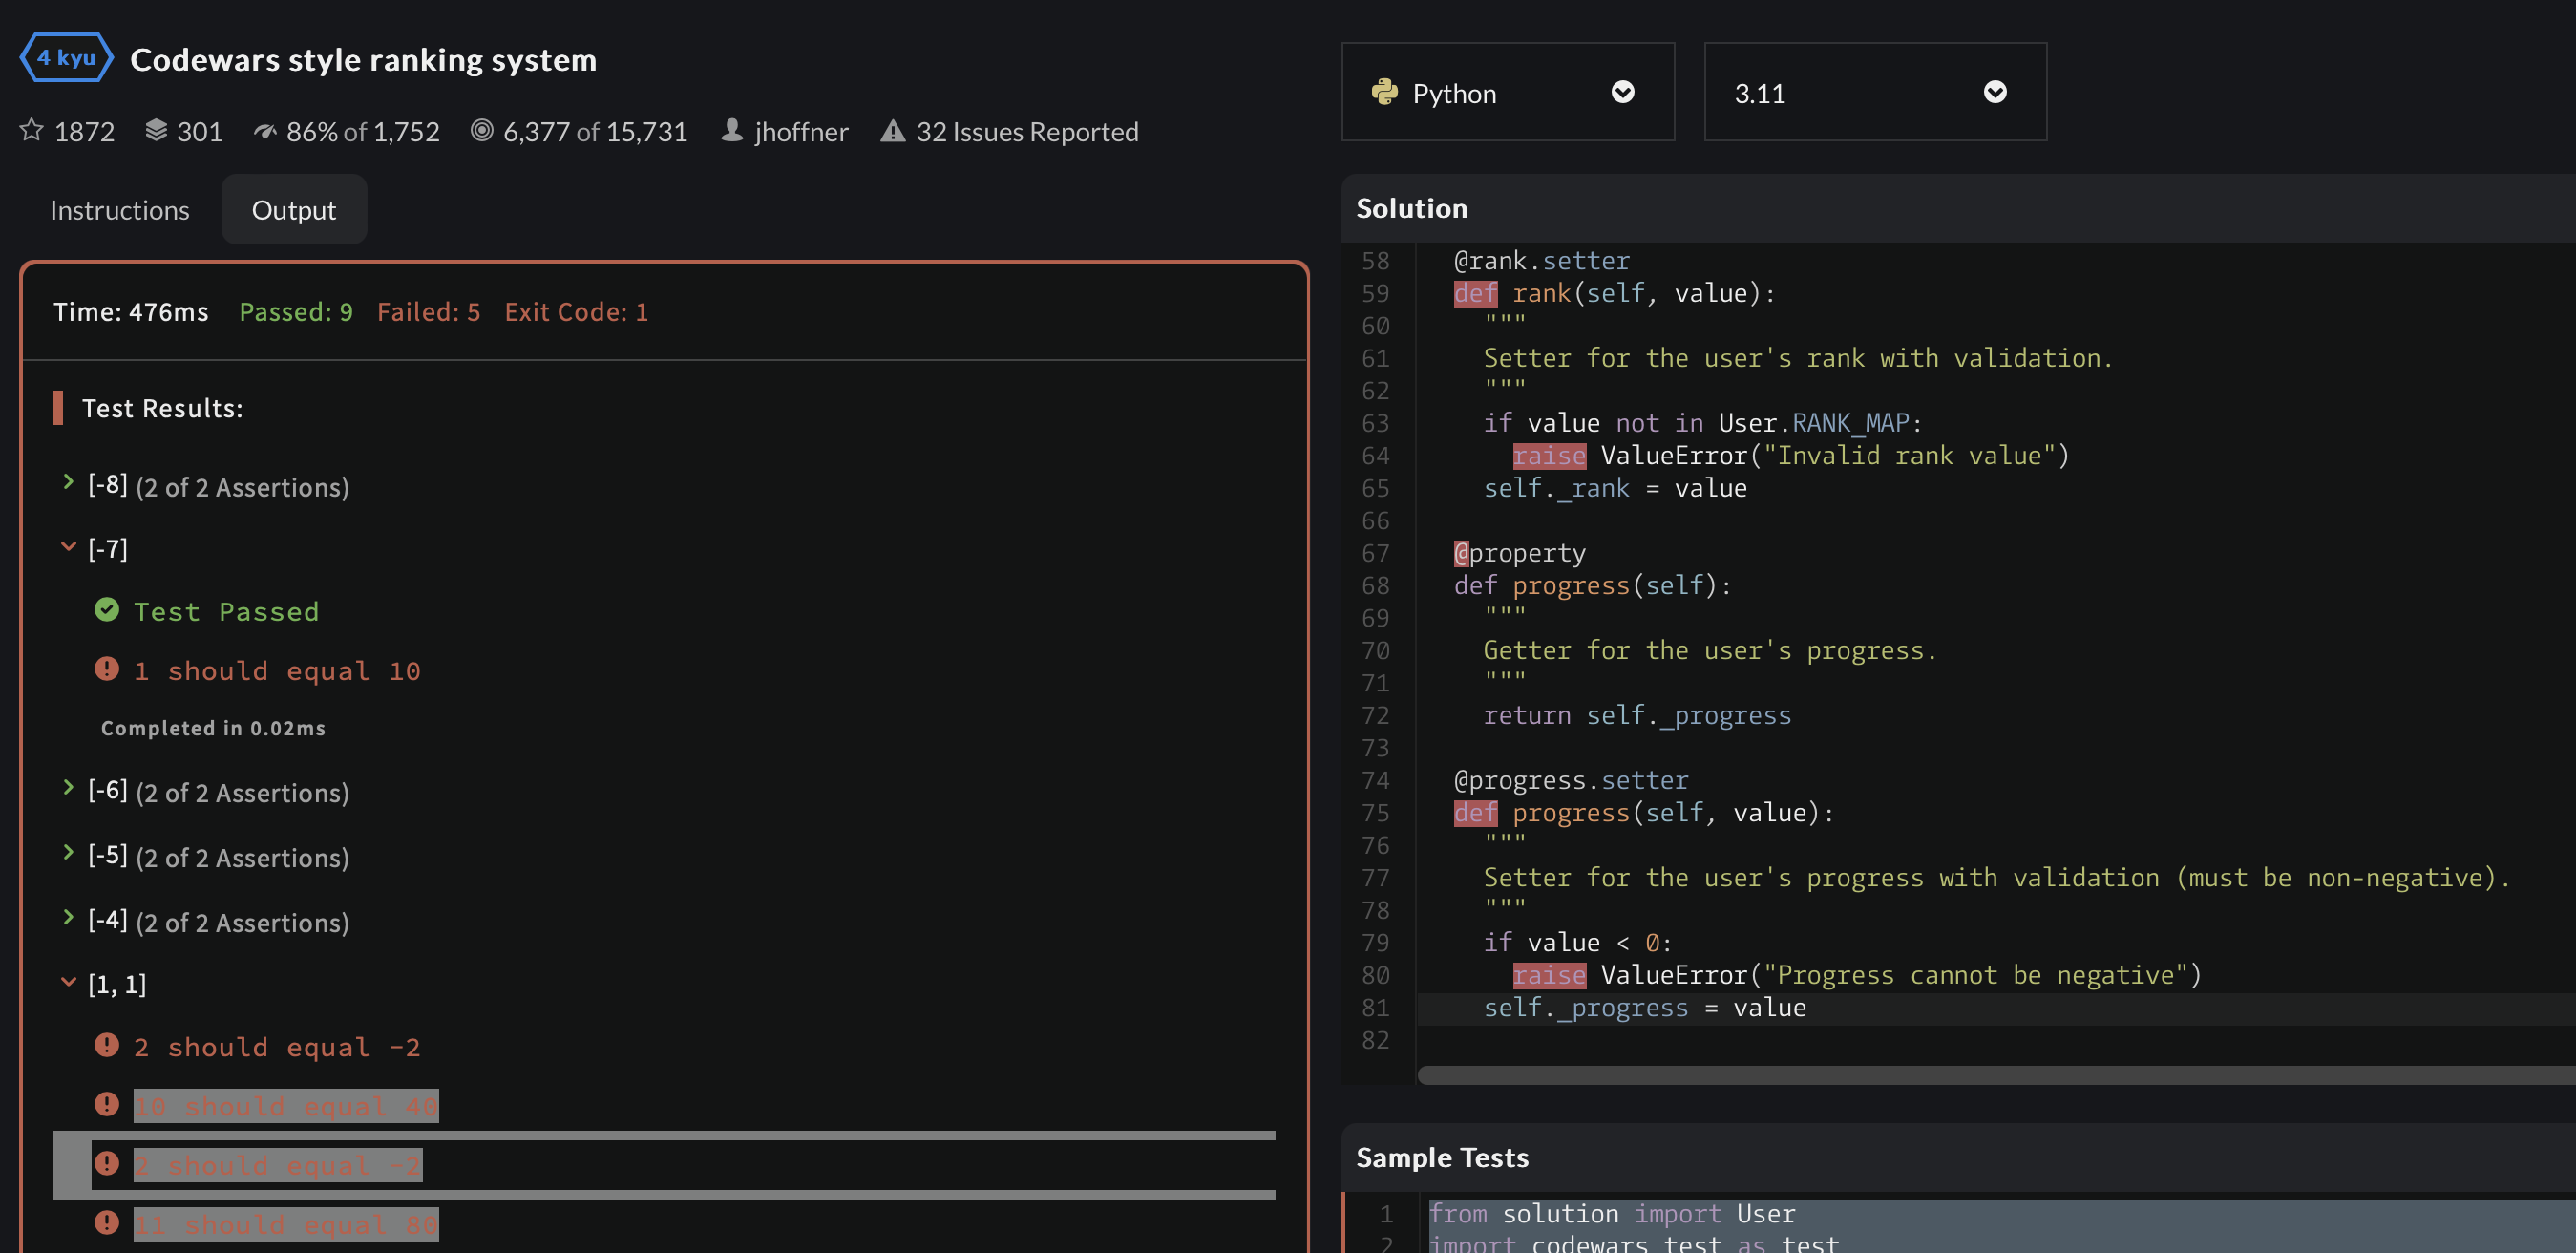

Second request:

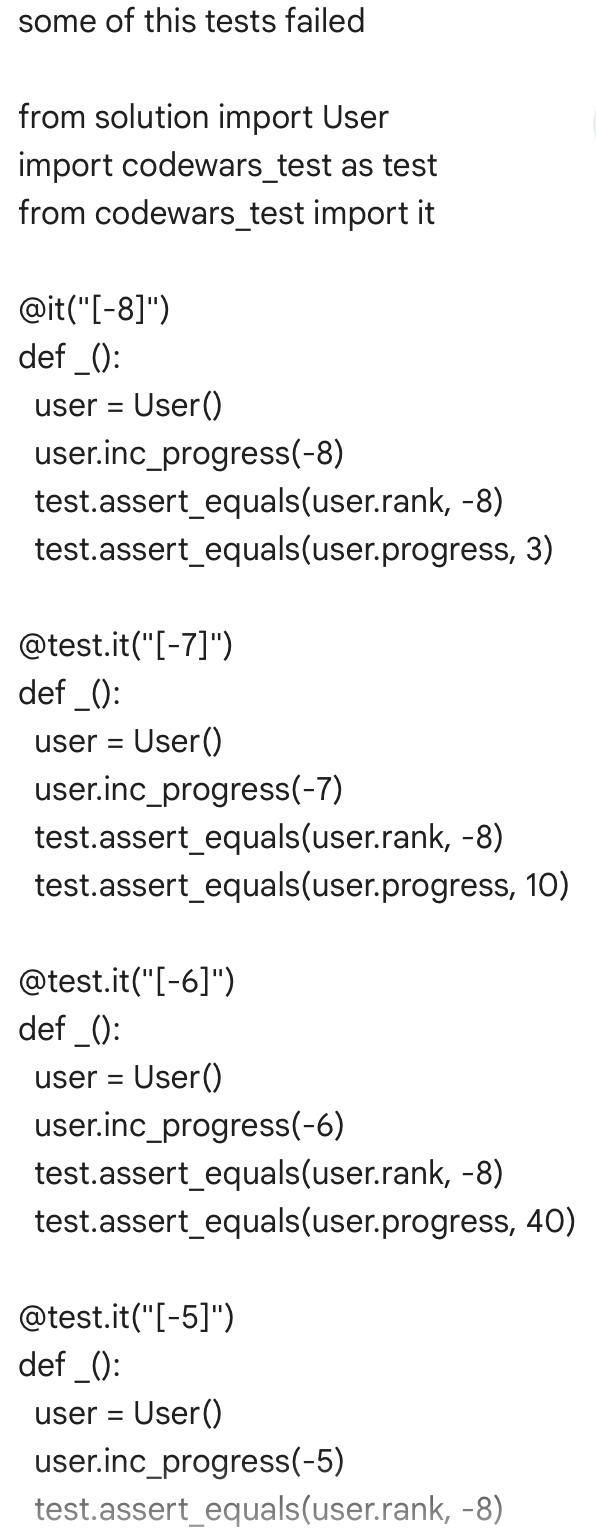

Gemini provide only a part of code and the rest is from the previous one.

In [ ]:
class User:
  """
  Represents a user with rank and progress in a ranking system.
  """
  RANK_MAP = {-8: -8, -7: -7, -6: -6, -5: -5, -4: -4, -3: -3, -2: -2, -1: 1, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}

  def __init__(self):
    """
    Initializes a User object with rank -8 and progress 0.
    """
    self.rank = -8
    self.progress = 0

  def inc_progress(self, activity_rank):
    """
    Increases the user's progress based on the completed activity rank.

    Args:
      activity_rank: The rank of the completed activity.

    Raises:
      ValueError: If the activity rank is outside the valid range.
    """
    if activity_rank not in User.RANK_MAP:
      raise ValueError("Invalid activity rank")
    rank_diff = abs(self.rank - activity_rank)
    points = 0
    if rank_diff == 0:
      points = 3
    elif rank_diff == 1:
      points = 1
    elif rank_diff >= 2:
      points = 10 * rank_diff * rank_diff

    self.progress += points
    self._update_rank()

  def _update_rank(self):
    """
    Updates the user's rank based on accumulated progress.
    """
    while self.progress >= 100:
      self.progress -= 100
      self.rank = User.RANK_MAP[self.rank + 1]
      if self.rank == 8:
        # Reached max rank, stop progressing
        self.progress = 0
        break

  def _update_rank(self):
    """
    Updates the user's rank based on accumulated progress.
    """
    while self.progress >= 100:
      self.progress -= 100
      self.rank = User.RANK_MAP[self.rank + 1]
      if self.rank == 8:
        # Reached max rank, stop progressing
        self.progress = 0
        break

  @property
  def rank(self):
    """
    Getter for the user's rank.
    """
    return self._rank

  @rank.setter
  def rank(self, value):
    """
    Setter for the user's rank with validation.
    """
    if value not in User.RANK_MAP:
      raise ValueError("Invalid rank value")
    self._rank = value

  @property
  def progress(self):
    """
    Getter for the user's progress.
    """
    return self._progress

  @progress.setter
  def progress(self, value):
    """
    Setter for the user's progress with validation (must be non-negative).
    """
    if value < 0:
      raise ValueError("Progress cannot be negative")
    self._progress = value


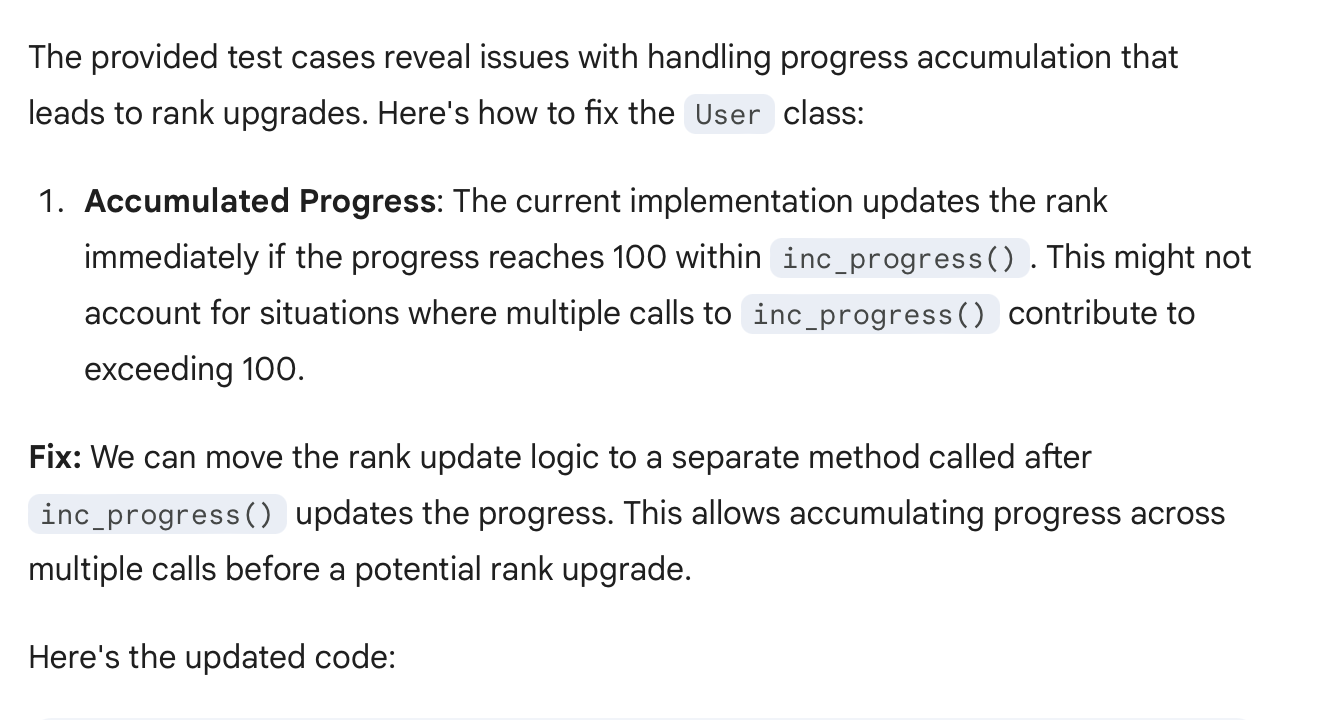

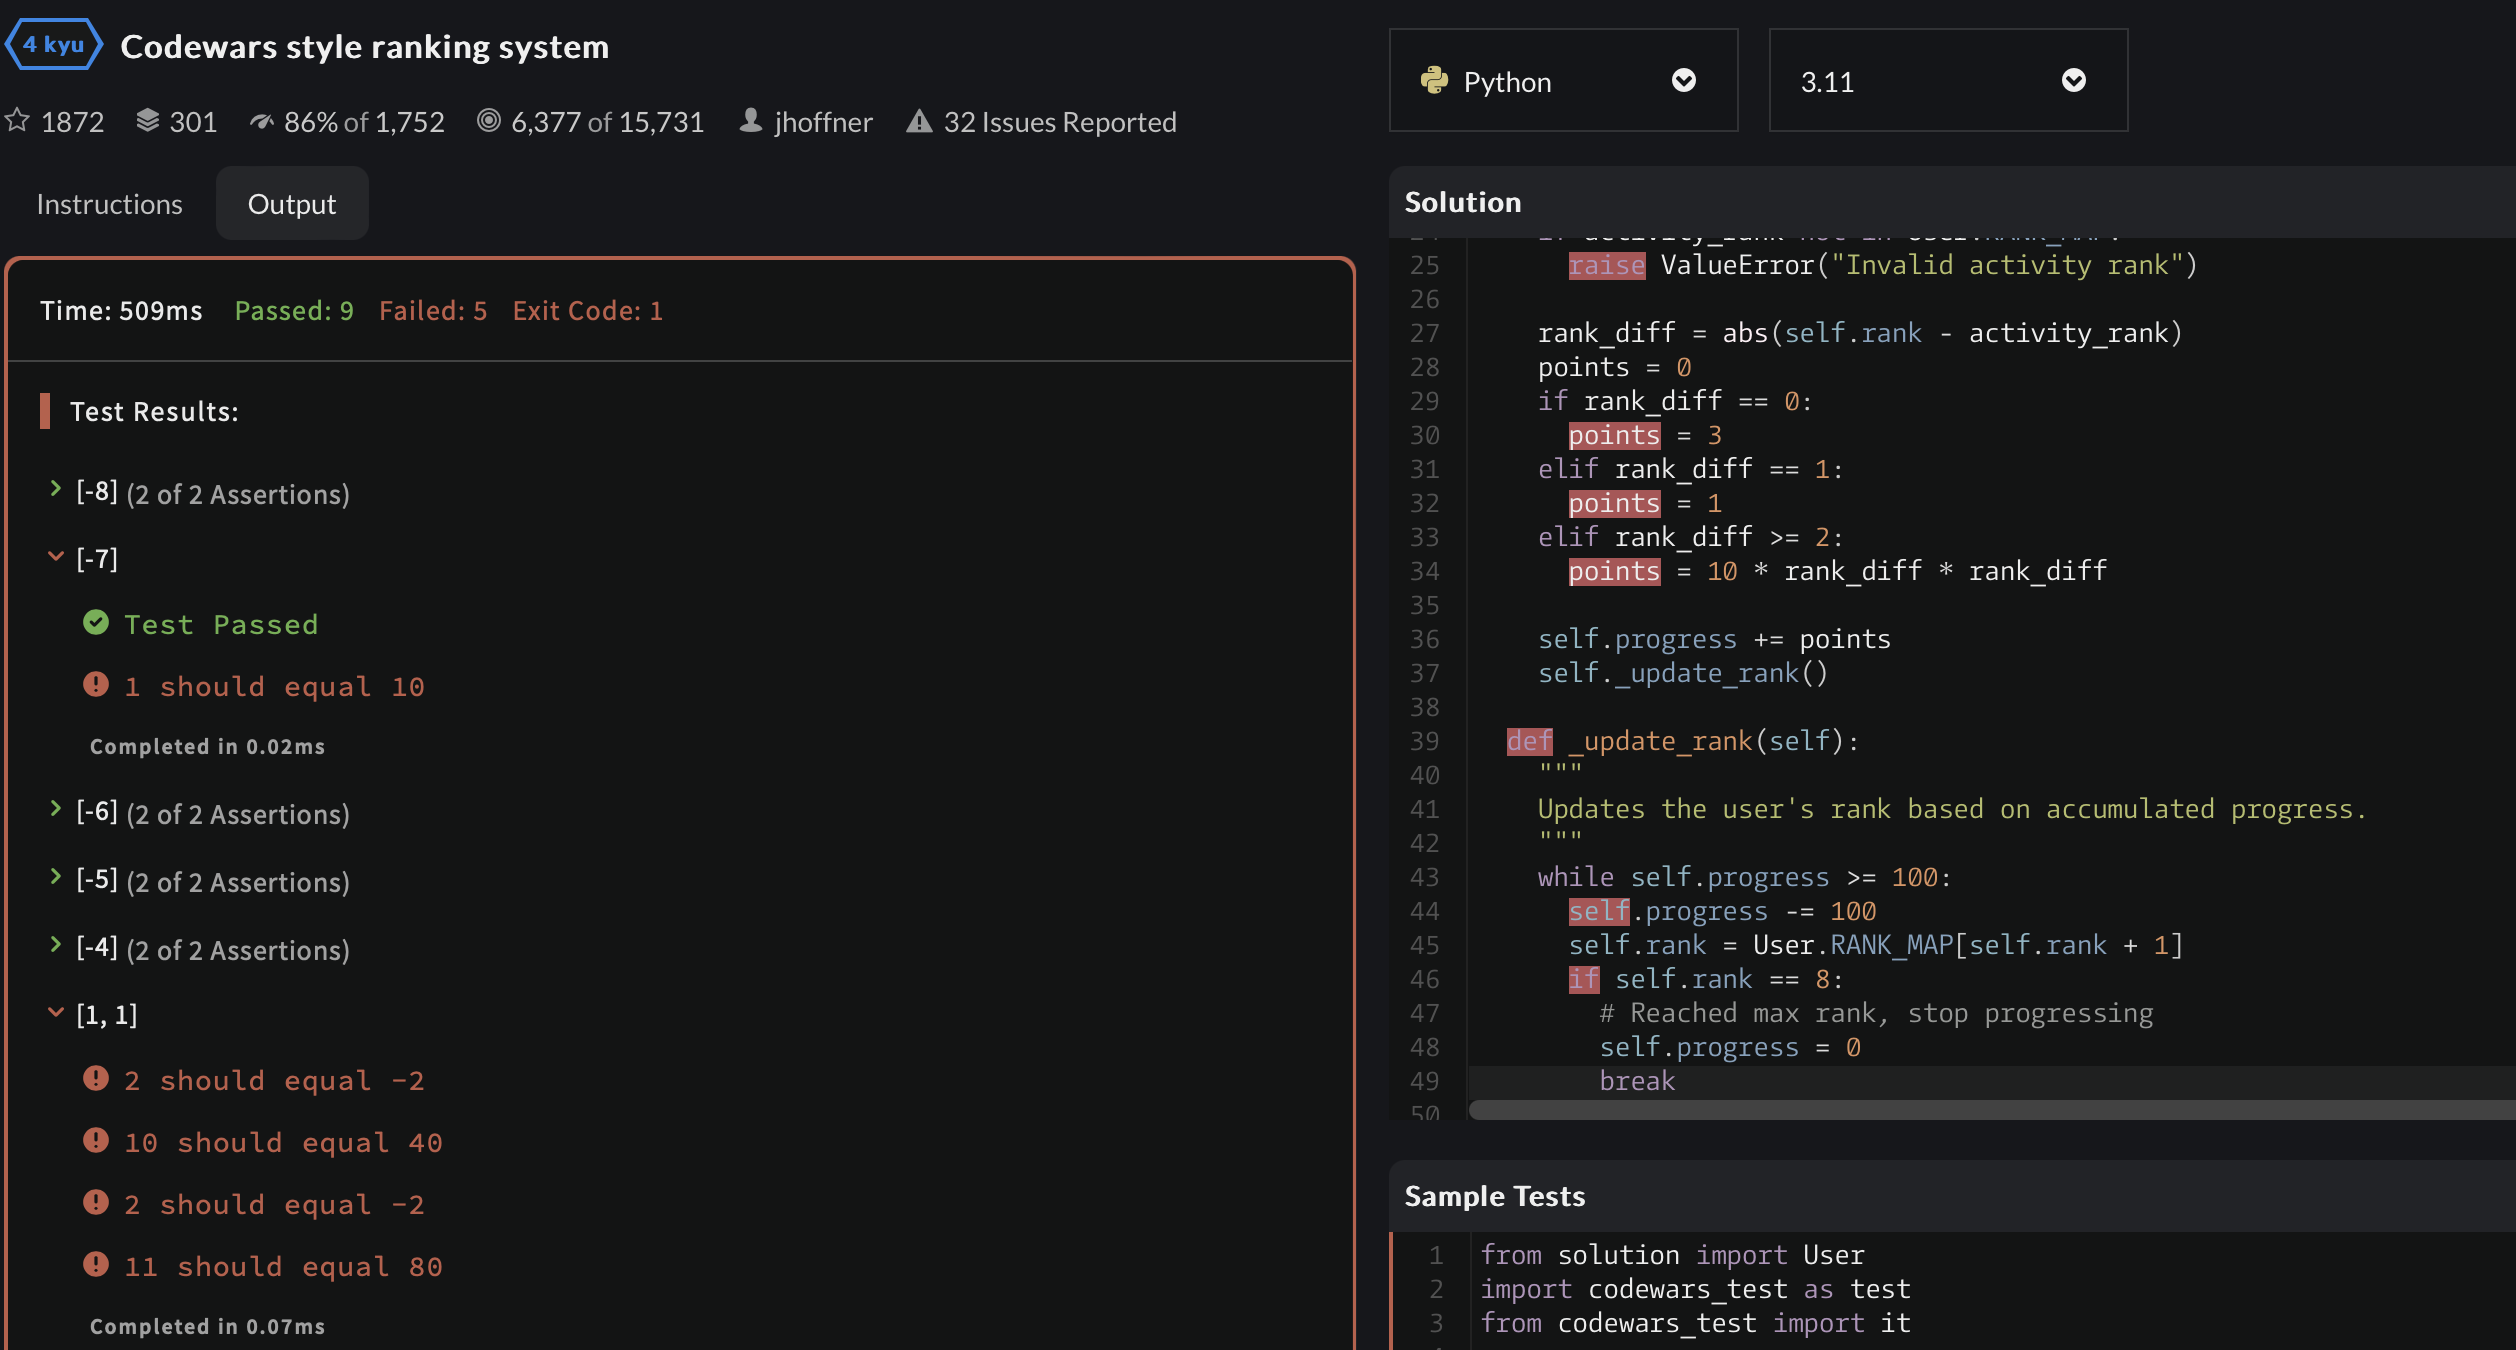

Next request:

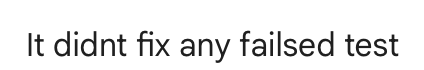

Gemini again provide only a part of code so the rest is from previous one.

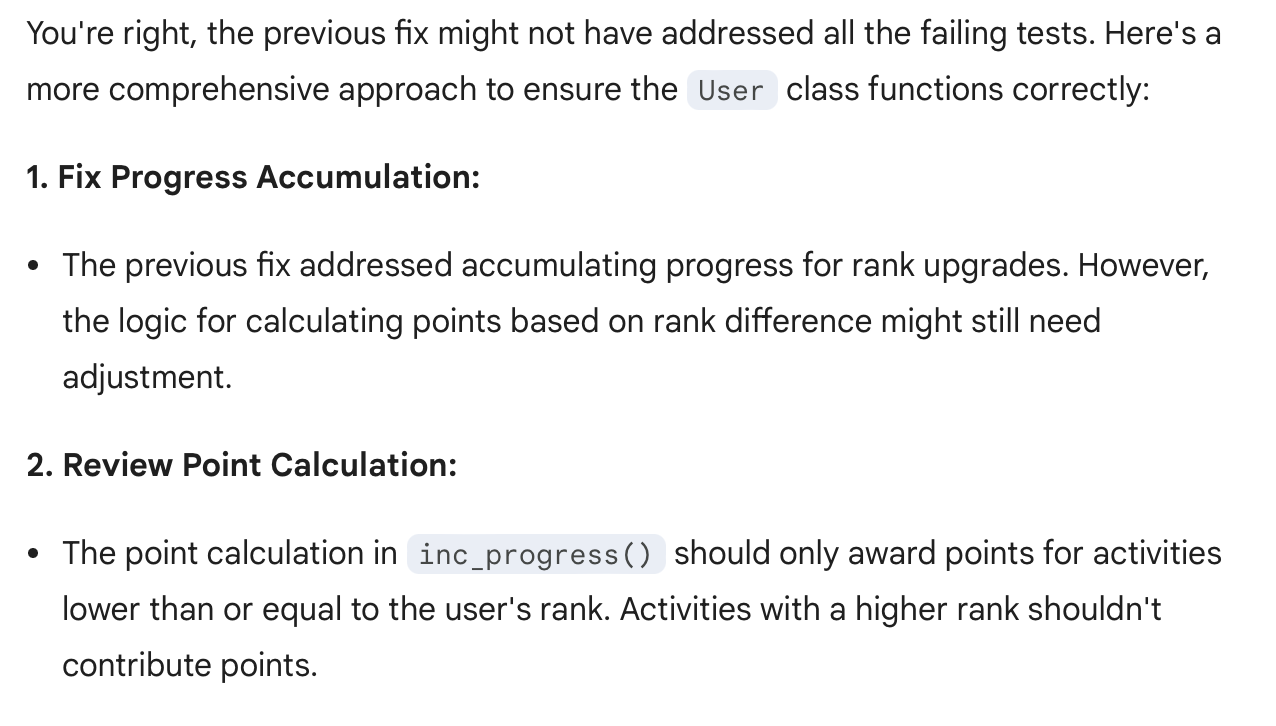

In [ ]:
class User:
  """
  Represents a user with rank and progress in a ranking system.
  """
  RANK_MAP = {-8: -8, -7: -7, -6: -6, -5: -5, -4: -4, -3: -3, -2: -2, -1: 1, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}

  def __init__(self):
    """
    Initializes a User object with rank -8 and progress 0.
    """
    self.rank = -8
    self.progress = 0

  def inc_progress(self, activity_rank):
    """
    Increases the user's progress based on the completed activity rank.

    Args:
      activity_rank: The rank of the completed activity.

    Raises:
      ValueError: If the activity rank is outside the valid range.
    """
    if activity_rank not in User.RANK_MAP:
      raise ValueError("Invalid activity rank")

    rank_diff = abs(self.rank - activity_rank)
    points = 0
    if rank_diff <= 1:  # Only award points for activities lower than or equal to current rank
      if rank_diff == 0:
        points = 3
      else:
        points = 1

    self.progress += points
    self._update_rank()

  def _update_rank(self):
    """
    Updates the user's rank based on accumulated progress.
    """
    while self.progress >= 100:
      self.progress -= 100
      self.rank = User.RANK_MAP[self.rank + 1]
      if self.rank == 8:
        # Reached max rank, stop progressing
        self.progress = 0
        break

  def _update_rank(self):
    """
    Updates the user's rank based on accumulated progress.
    """
    while self.progress >= 100:
      self.progress -= 100
      self.rank = User.RANK_MAP[self.rank + 1]
      if self.rank == 8:
        # Reached max rank, stop progressing
        self.progress = 0
        break

  @property
  def rank(self):
    """
    Getter for the user's rank.
    """
    return self._rank

  @rank.setter
  def rank(self, value):
    """
    Setter for the user's rank with validation.
    """
    if value not in User.RANK_MAP:
      raise ValueError("Invalid rank value")
    self._rank = value

  @property
  def progress(self):
    """
    Getter for the user's progress.
    """
    return self._progress

  @progress.setter
  def progress(self, value):
    """
    Setter for the user's progress with validation (must be non-negative).
    """
    if value < 0:
      raise ValueError("Progress cannot be negative")
    self._progress = value


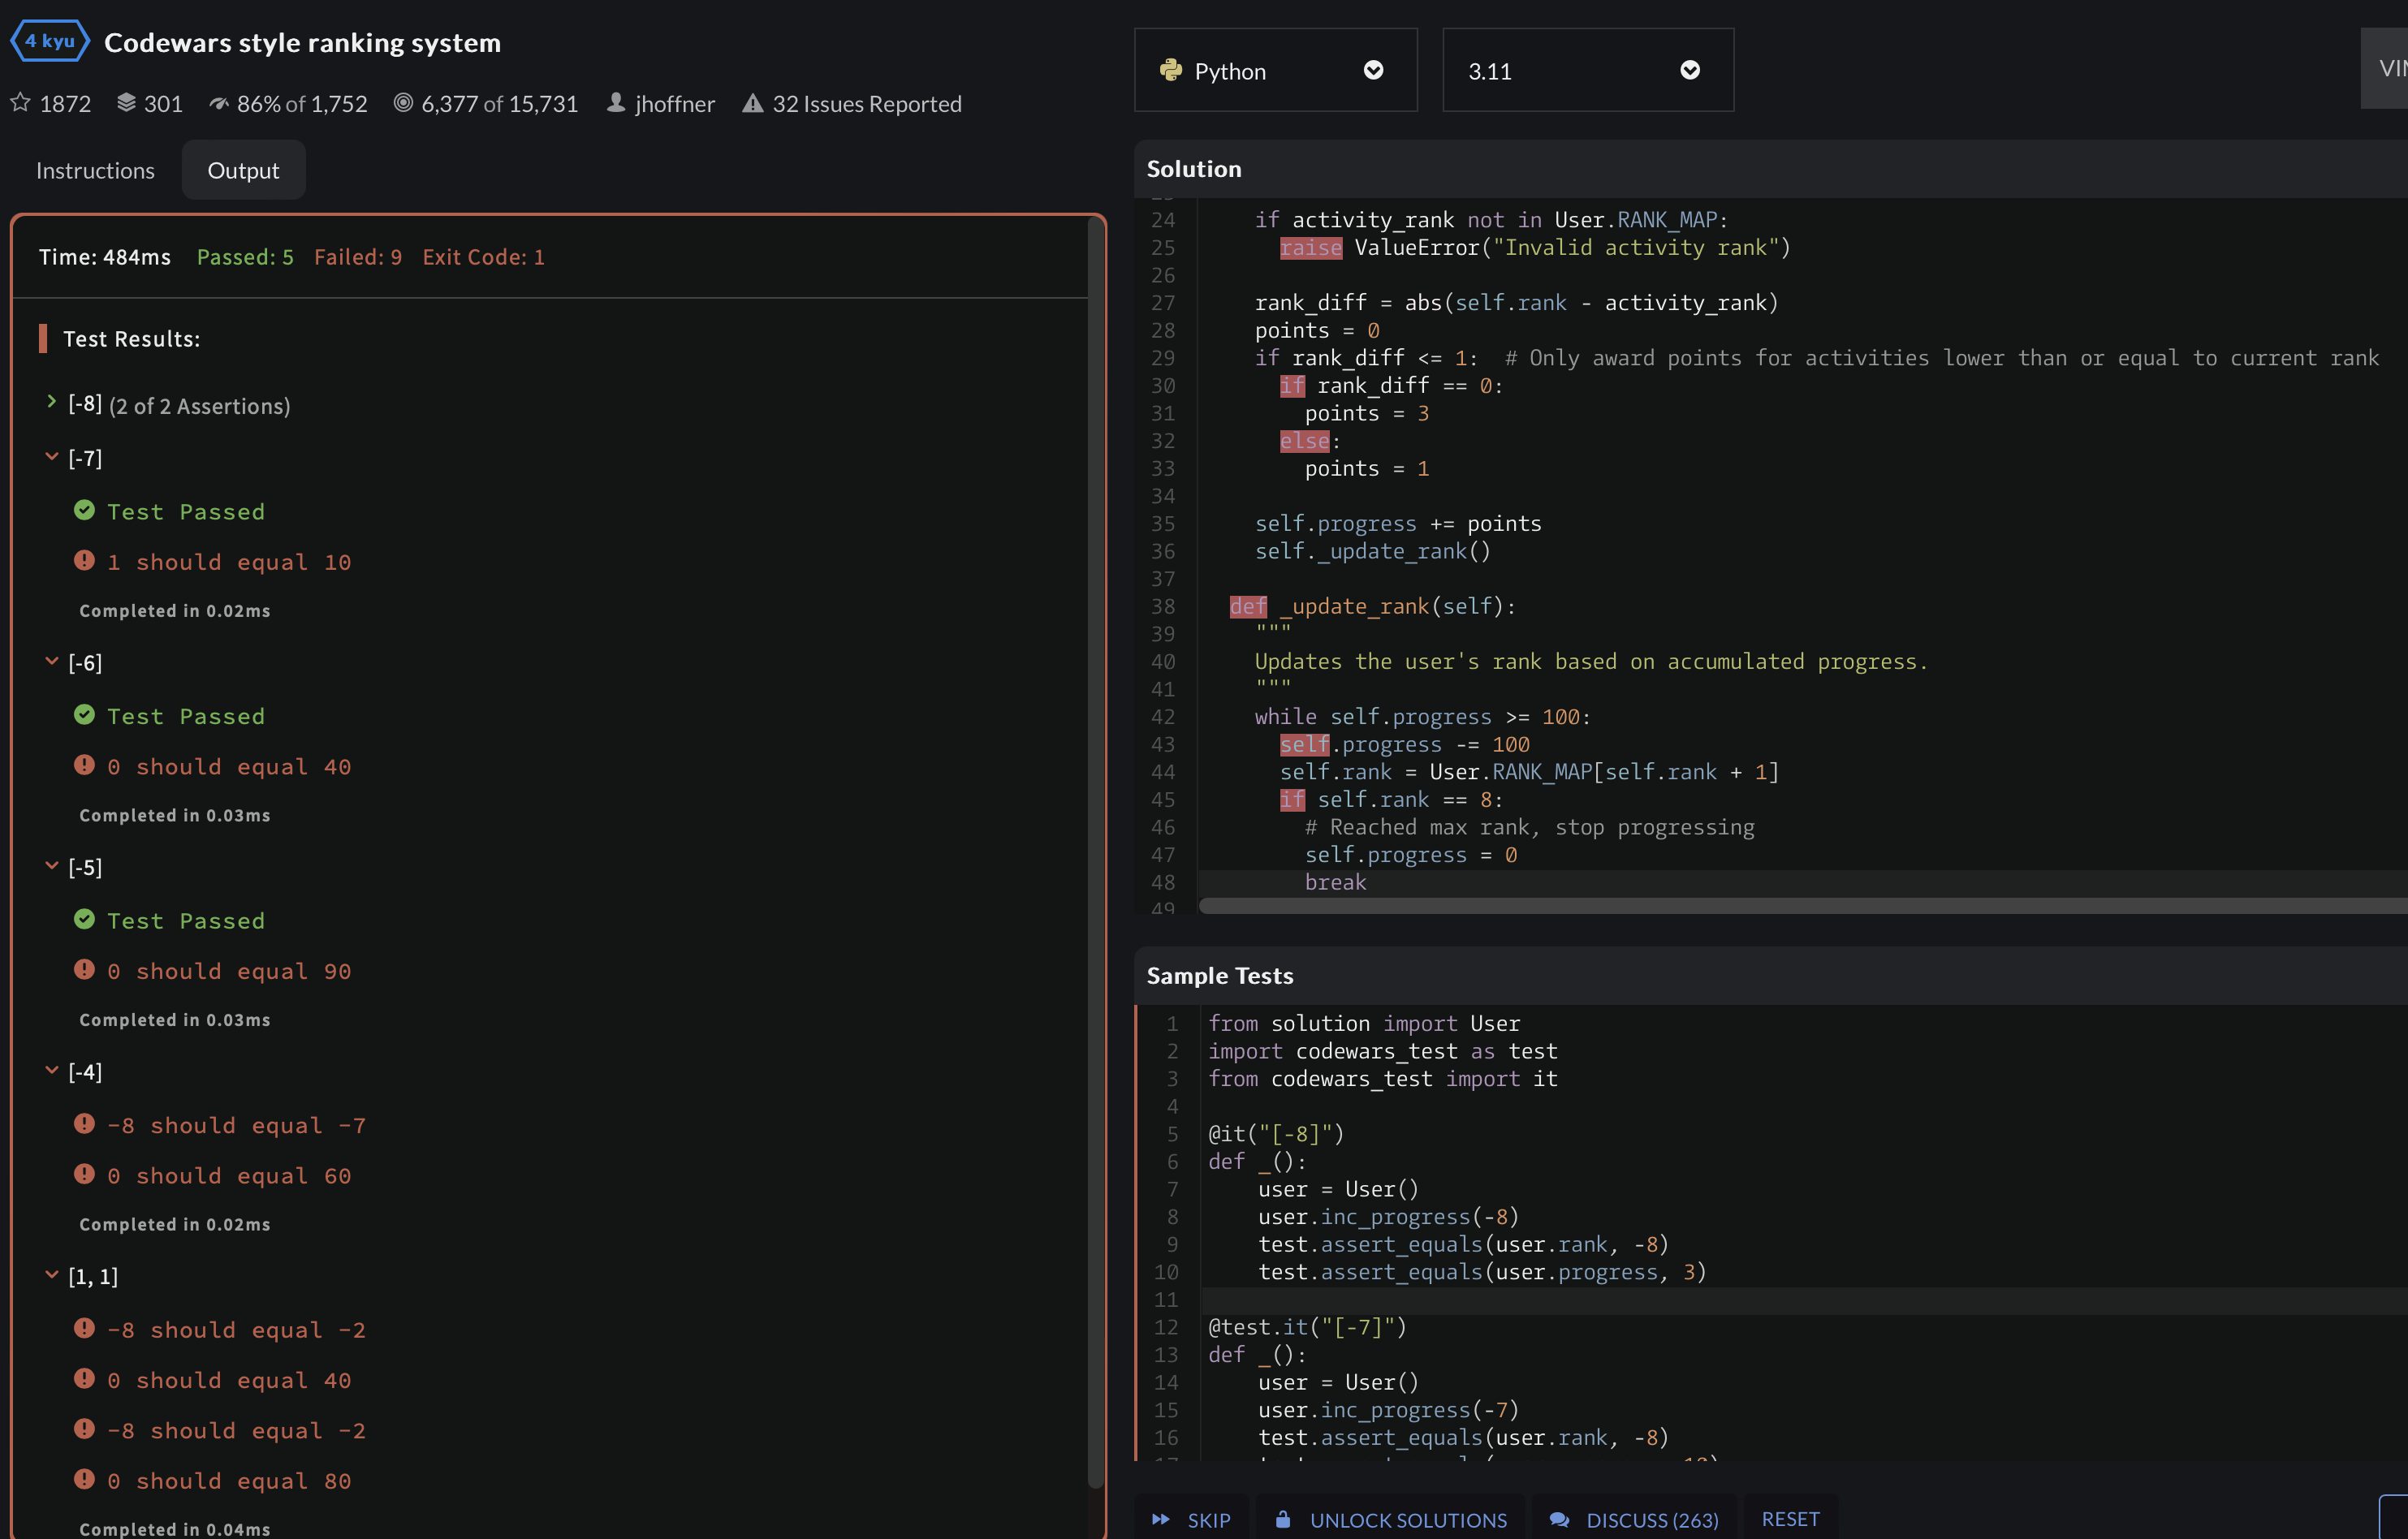

I work with the second code as there was less failures. I correct inc_progress() function as there was incorrect statements probably due to misunderstaning the task. I change dictionary value for -1 as it was 1 instead of -1. Also, I add several errors to handle incorrect testcases.

In [ ]:
class User:
    """
    Represents a user with rank and progress in a ranking system.
    """
    RANK_MAP = {-8: -8, -7: -7, -6: -6, -5: -5, -4: -4, -3: -3, -2: -2, -1: -1, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}

    def __init__(self):
        """
        Initializes a User object with rank -8 and progress 0.
        """
        self._rank = -8
        self._progress = 0

    def inc_progress(self, activity_rank):
        """
        Increases the user's progress based on the completed activity rank.

        Args:
          activity_rank: The rank of the completed activity.

        Raises:
          ValueError: If the activity rank is outside the valid range.
        """
        if activity_rank not in User.RANK_MAP:
            raise ValueError("Invalid activity rank")
        if self._rank < 8:

            rank_diff = activity_rank - self._rank
            if activity_rank > 0 and self.rank < 0:
                rank_diff -= 1
            if activity_rank < 0 and self.rank > 0:
                rank_diff += 1
            if rank_diff > 0:
                progress = 10 * rank_diff ** 2
            elif rank_diff == 0:
                progress = 3
            elif rank_diff == -1:
                progress = 1
            else:
                progress = 0

            self._progress += progress
            if self._progress >= 100:
                self._update_rank()

    def _update_rank(self):
        """
        Updates the user's rank based on accumulated progress.
        """
        while self._progress >= 100:
            self._progress -= 100
            self._rank += 1
            if self._rank == 0:
                self._rank = 1
            if self._rank >= 8:
                # Reached max rank, stop progressing
                self._rank = 8
                self._progress = 0
                break

    @property
    def rank(self):
        """
        Getter for the user's rank.
        """
        if self._rank not in User.RANK_MAP:
            raise ValueError("Invalid rank value")
        return self._rank

    @property
    def progress(self):
        """
        Getter for the user's progress.
        """
        if self._progress < 0:
            raise ValueError("Progress cannot be negative")
        return self._progress%100


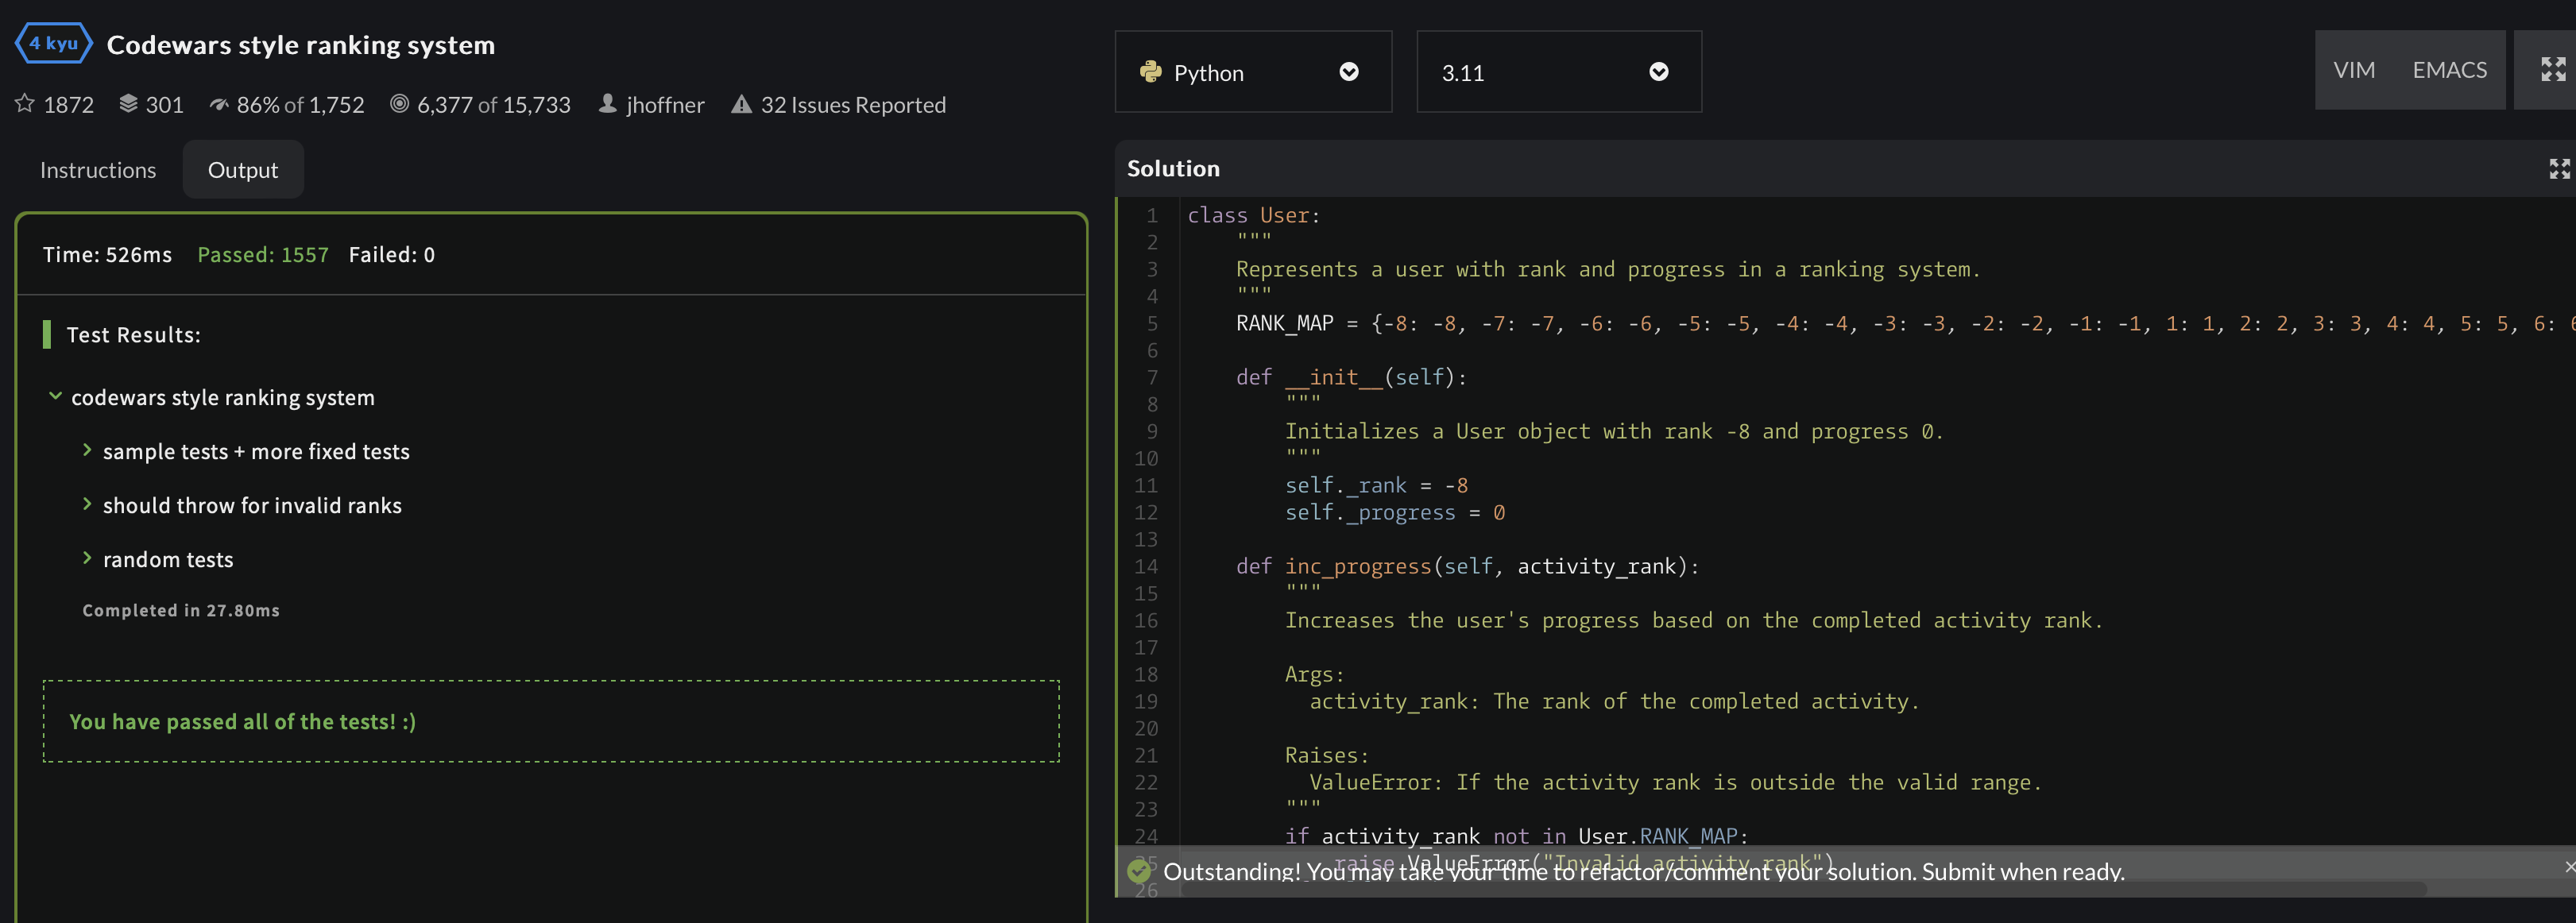